In [2]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

%matplotlib inline
import matplotlib.pyplot as plt
from Fungsi import sigmoid 

# Generate Data
Dengan menggunakan random shuffle, data-data pada awalnya merupakan data yang random

## Data Cakno

In [3]:
# Tinggi Badan
x1 = np.array([18 + np.random.randn() for i in range (1, 100)])

# Berat Badan 
x2 = np.array([5 + np.random.randn() for i in range(1, 100)])

# Initial status cakno
y1 = np.array([1 for i in range(1, 100)])

# Initial status cakni
y2 = np.array([0 for i in range(1, 100)])

# label
label = ["Cakno" for i in range(1, 100)]

data_1 = {
    'x1': x1, 
    'x2': x2, 
    'y1': y1, 
    'y2': y2, 
    'label': label
}

df1 = pd.DataFrame(data_1)
print(df1)

           x1        x2  y1  y2  label
0   18.949796  7.083611   1   0  Cakno
1   17.550701  5.784376   1   0  Cakno
2   20.123424  5.611954   1   0  Cakno
3   18.949031  3.719466   1   0  Cakno
4   17.342153  6.339368   1   0  Cakno
..        ...       ...  ..  ..    ...
94  17.418216  5.148307   1   0  Cakno
95  18.545054  5.449516   1   0  Cakno
96  18.027308  5.144163   1   0  Cakno
97  17.357501  4.718383   1   0  Cakno
98  16.889109  5.062157   1   0  Cakno

[99 rows x 5 columns]


## Data Cakni

In [4]:
x1 = np.array([10 + np.random.randn() for i in range(1, 100)])

x2 = np.array([5 + np.random.randn() for i in range(1, 100)])

y1 = np.array([0 for i in range(1, 100)])

y2 = np.array([1 for i in range(1, 100)])

label = ["Cakni" for i in range(1, 100)]

data_2 = {
    'x1': x1, 
    'x2': x2, 
    'y1': y1, 
    'y2': y2, 
    'label': label
}

df2 = pd.DataFrame(data_2)
print(df2)

           x1        x2  y1  y2  label
0   11.741278  5.431852   0   1  Cakni
1   11.435454  2.703302   0   1  Cakni
2    9.753131  4.455709   0   1  Cakni
3    9.036143  4.223610   0   1  Cakni
4   11.872150  8.053086   0   1  Cakni
..        ...       ...  ..  ..    ...
94  10.068671  5.952724   0   1  Cakni
95   8.394818  3.313068   0   1  Cakni
96  11.180985  5.094373   0   1  Cakni
97  10.588736  4.357030   0   1  Cakni
98   9.860565  5.702242   0   1  Cakni

[99 rows x 5 columns]


## Concatenate DataFrames

In [5]:
data_frame = pd.concat([df1, df2])
data_frame = shuffle(data_frame)
data_frame.reset_index(inplace=True, drop=True)

print(data_frame)

            x1        x2  y1  y2  label
0    18.764948  6.015376   1   0  Cakno
1     8.364499  4.314579   0   1  Cakni
2    17.645487  6.522596   1   0  Cakno
3    11.117898  4.714304   0   1  Cakni
4    17.162170  3.489709   1   0  Cakno
..         ...       ...  ..  ..    ...
193  11.435454  2.703302   0   1  Cakni
194  17.836381  4.278300   1   0  Cakno
195  10.490047  6.976854   0   1  Cakni
196   9.414974  6.495642   0   1  Cakni
197   8.847327  2.164682   0   1  Cakni

[198 rows x 5 columns]


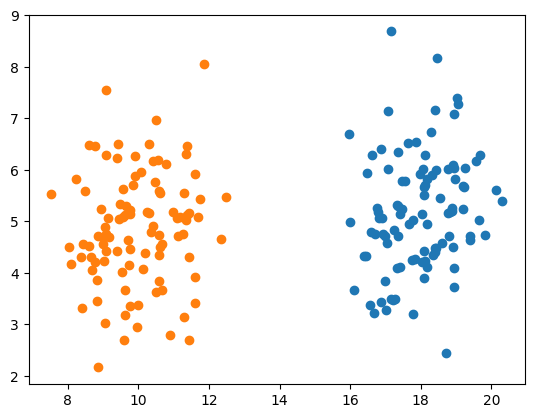

In [6]:
plt.scatter(df1.x1, df1.x2)
plt.scatter(df2.x1, df2.x2)
plt.show()

# Neural Network

### 1. Matriks Weight

In [7]:
w11 = np.random.uniform(-0.01, 0.01)
w12 = np.random.uniform(-0.01, 0.01)
w21 = np.random.uniform(-0.01, 0.01)
w22 = np.random.uniform(-0.01, 0.01)

W = np.array([[w11, w12], [w21, w22]])
print(W)

[[ 0.00623807 -0.00862457]
 [-0.00010066 -0.00059728]]


### 2. Iterasi Neural Network

In [9]:
learning_rate = 0.1
answer = []
error_array = np.zeros((2, len(data_frame)))
for index, baris in data_frame.iterrows(): 
    W_lama = W
    input = np.array([[baris.x1], [baris.x2]])
    output_hidden = np.dot(W_lama, input)
    output_learn = sigmoid(output_hidden)
    output_actual = np.array([[baris.y1], [baris.y2]])

    # Error relative
    error = output_actual - output_learn

    delta_W = np.dot(learning_rate * error * output_learn * (1 - output_learn), input.T)

    W_baru = W_lama + delta_W
    W = W_baru

    error_array[:, index] = error.T * error.T

    # Printint
    tebakan = np.argmax(output_learn)
    jawaban = np.argmax(output_actual)

    label_tebakan = "Cakno" if tebakan == 1 else "Cakni"

    print(f'index = {index}, tebakan = {label_tebakan}, jawaban = {baris.label}')

    if tebakan == jawaban:
        answer.append(1)
    else:
        answer.append(0)

index = 0, tebakan = Cakni, jawaban = Cakno
index = 1, tebakan = Cakni, jawaban = Cakni
index = 2, tebakan = Cakni, jawaban = Cakno
index = 3, tebakan = Cakni, jawaban = Cakni
index = 4, tebakan = Cakni, jawaban = Cakno
index = 5, tebakan = Cakni, jawaban = Cakni
index = 6, tebakan = Cakno, jawaban = Cakni
index = 7, tebakan = Cakno, jawaban = Cakni
index = 8, tebakan = Cakno, jawaban = Cakno
index = 9, tebakan = Cakno, jawaban = Cakni
index = 10, tebakan = Cakno, jawaban = Cakni
index = 11, tebakan = Cakno, jawaban = Cakni
index = 12, tebakan = Cakno, jawaban = Cakno
index = 13, tebakan = Cakno, jawaban = Cakni
index = 14, tebakan = Cakno, jawaban = Cakno
index = 15, tebakan = Cakno, jawaban = Cakno
index = 16, tebakan = Cakni, jawaban = Cakni
index = 17, tebakan = Cakni, jawaban = Cakni
index = 18, tebakan = Cakni, jawaban = Cakni
index = 19, tebakan = Cakno, jawaban = Cakno
index = 20, tebakan = Cakni, jawaban = Cakni
index = 21, tebakan = Cakni, jawaban = Cakni
index = 22, tebakan 

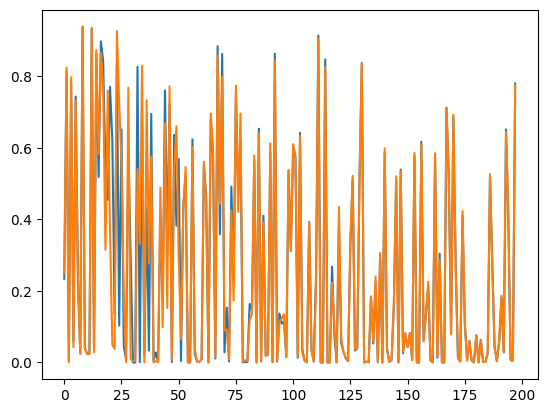

In [10]:
plt.plot(error_array.T)

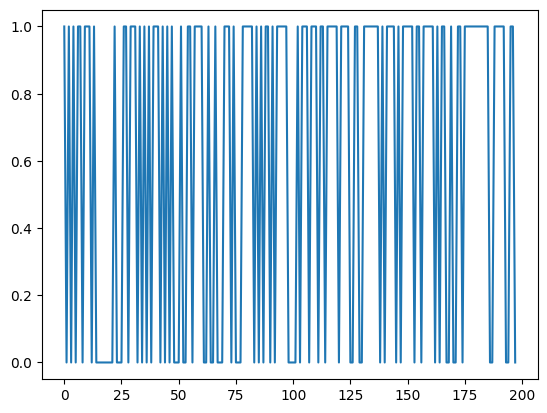

In [11]:
plt.plot(answer)

## Tebakan

In [16]:
x1 = 14
x2 = 5

input = np.array([[x1], [x2]])
output_hidden = np.dot(W, input)
output_prediction = sigmoid(output_hidden)

prediction = np.argmax(output_prediction)
label_prediction = "Cakno" if prediction == 1 else "Cakni"

print(f'Tinggi = {x1 * 10} berat = {x2 * 10}, adalah {label_prediction}')

Tinggi = 140 berat = 50, adalah Cakni
